In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import pandas as pd
from rpca import R_pca

In [2]:
df = pd.read_csv("US Stock Market Dataset.csv")

In [3]:
for i in zip(df.columns.drop("Date"),df.dtypes.drop("Date")):
    if (i[1]!=np.float64) and (i[1]!=np.int64):
        df[i[0]] = df[i[0]].str.replace(",","").astype(float)

In [4]:
df["Date"] = [pd.to_datetime(i,dayfirst=True) for i in df["Date"]]

In [5]:
# df['Date'] = pd.to_datetime(df['Date'],errors = 'coerce')
# Sort DataFrame by 'Date' column in increasing order
df.sort_values(by='Date', inplace=True)

In [6]:
df = df.dropna()

In [7]:
numeric_columns = ['Bitcoin_Price','Platinum_Price','Ethereum_Price','S&P_500_Price','Nasdaq_100_Price','Berkshire_Price','Gold_Price']
df[numeric_columns] = df[numeric_columns].replace({',':''},regex = True).astype(float)

In [8]:
price_columns = ['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Bitcoin_Price', 'Berkshire_Price', 'Netflix_Price', 'Amazon_Price', 'Meta_Price', 'Gold_Price']
vol_columns = ['Natural_Gas_Vol.', 'Crude_oil_Vol.', 'Copper_Vol.', 'Bitcoin_Vol.', 'Berkshire_Vol.', 'Netflix_Vol.', 'Amazon_Vol.', 'Meta_Vol.', 'Gold_Vol.']

In [9]:
df[price_columns]

,Natural_Gas_Price,Crude_oil_Price,Copper_Price,Bitcoin_Price,Berkshire_Price,Netflix_Price,Amazon_Price,Meta_Price,Gold_Price
867,2.101,41.01,2.9205,11224.4,298800.0,498.62,155.59,251.96,1986.3
866,2.193,41.70,2.9030,11184.7,300330.0,509.64,156.94,249.83,2021.0
865,2.191,42.19,2.9250,11735.1,305200.0,502.11,160.25,249.12,2049.3
864,2.165,41.95,2.9190,11757.1,307455.0,509.08,161.25,265.28,2069.4
863,2.238,41.22,2.8020,11592.0,314334.0,494.73,158.37,268.44,2028.0
...,...,...,...,...,...,...,...,...,...
32,2.491,71.43,3.8905,41929.0,544478.0,472.06,149.97,334.92,2026.0
31,2.503,72.47,3.8520,42659.7,551182.0,486.12,154.07,344.62,2030.9
30,2.492,73.44,3.8980,42259.3,554650.0,495.02,153.79,350.36,2042.6
29,2.447,74.22,3.9060,43662.8,543740.0,489.27,152.12,349.28,2038.1


In [10]:
D = df[price_columns].to_numpy()
mx = D.max(axis=0)
D = D/mx

In [11]:
rpca = R_pca(D,mu=1,lmbda=0.05)

In [12]:
L,S = rpca.fit()

iteration: 1, error: 2.3335091637373733
iteration: 100, error: 0.00018863569424111537
iteration: 200, error: 4.018281904046022e-05
iteration: 274, error: 5.28761623346678e-06


In [13]:
np.linalg.matrix_rank(L)

8

Rank reduced from 9 to 8, so now one of the columns can be explained by rest 8, and the remaining part is non linear which is in S

In [14]:
def plot_ts_for_idx(idx, title):
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(D)),L[:,idx]*mx[idx],label='RPCA Guess (L)')
    plt.plot(range(len(D)),S[:,idx]*mx[idx],label='RPCA Error (S)')
    plt.plot(range(len(D)),(D[:,idx]*mx[idx]),label='Actual (D)')
    plt.title(title)
    plt.ylabel("Price ($)")
    plt.xlabel("Time (Days)")
    plt.legend()
    plt.savefig(f"{price_columns[idx]}.png")

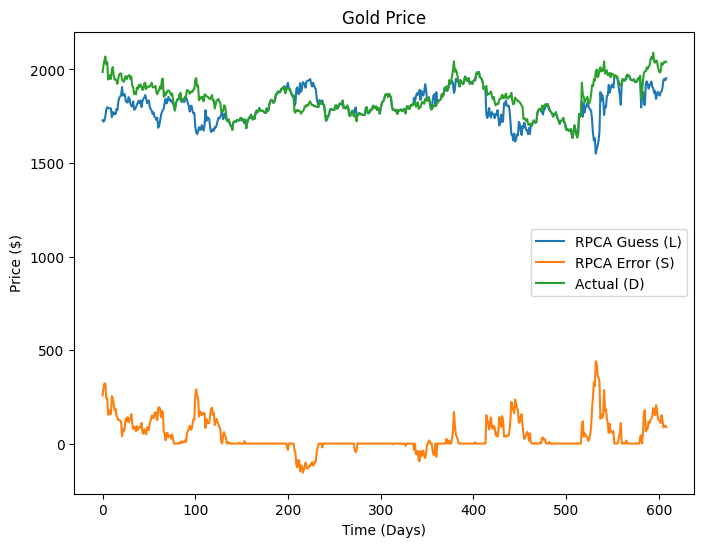

In [15]:
plot_ts_for_idx(-1,"Gold Price")

In [16]:
np.where(S[:,-1]*mx[-1] > 200)

(array([  0,   1,   2,   3,   4,   5,  10,  11,  12, 100, 101, 102, 103,
        441, 445, 446, 529, 530, 531, 532, 533, 534, 535, 536, 541, 597]),)

In [17]:
df.iloc[532]

Unnamed: 0                           221
Date                 2023-03-17 00:00:00
Natural_Gas_Price                  2.446
Natural_Gas_Vol.                101400.0
Crude_oil_Price                    66.74
Crude_oil_Vol.                  152260.0
Copper_Price                      3.8925
Copper_Vol.                      72130.0
Bitcoin_Price                    27391.8
Bitcoin_Vol.                      674960
Platinum_Price                     978.6
Platinum_Vol.                    23920.0
Ethereum_Price                   1789.38
Ethereum_Vol.                     975130
S&P_500_Price                    3916.64
Nasdaq_100_Price                12519.88
Nasdaq_100_Vol.              715660000.0
Apple_Price                        155.0
Apple_Vol.                      98940000
Tesla_Price                       180.13
Tesla_Vol.                     133200000
Microsoft_Price                   279.43
Microsoft_Vol.                  69530000
Silver_Price                      22.351
Silver_Vol.     

https://www.reuters.com/markets/commodities/gold-poised-best-week-since-mid-nov-banking-sector-tension-2023-03-17/ , gold stonks

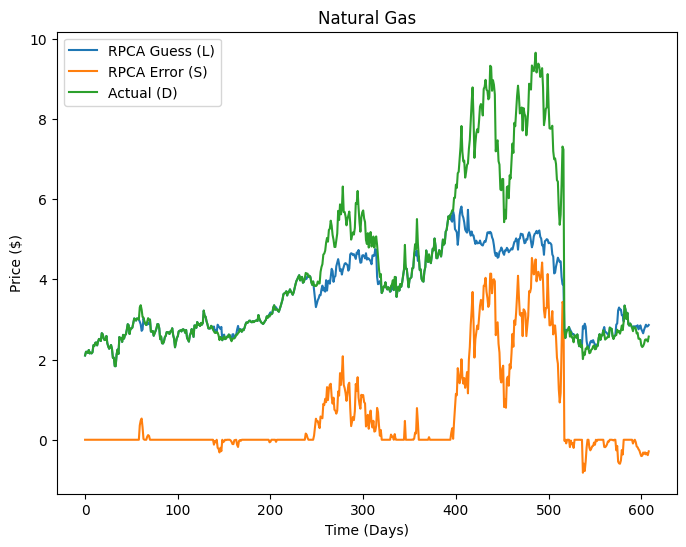

In [18]:
plot_ts_for_idx(0, "Natural Gas")

In [19]:
np.where(S[:,0]*mx[0] > 4.2)

(array([482, 483, 485, 486, 493]),)

In [20]:
df.iloc[482]

Unnamed: 0                           367
Date                 2022-08-16 00:00:00
Natural_Gas_Price                  9.329
Natural_Gas_Vol.                104090.0
Crude_oil_Price                    86.53
Crude_oil_Vol.                  305370.0
Copper_Price                      3.6375
Copper_Vol.                       3430.0
Bitcoin_Price                    23856.8
Bitcoin_Vol.                      201700
Platinum_Price                     932.0
Platinum_Vol.                      440.0
Ethereum_Price                    1876.7
Ethereum_Vol.                     725780
S&P_500_Price                     4305.2
Nasdaq_100_Price                13635.21
Nasdaq_100_Vol.              180390000.0
Apple_Price                       173.03
Apple_Vol.                      56380000
Tesla_Price                       306.56
Tesla_Vol.                      88140000
Microsoft_Price                   292.71
Microsoft_Vol.                  18100000
Silver_Price                      20.085
Silver_Vol.     

https://www.esma.europa.eu/sites/default/files/2023-10/ESMA50-524821-2963_TRV_Article_the_August_2022_surge_in_the_price_of_natural_gas_futures.pdf , natural gas price stonks


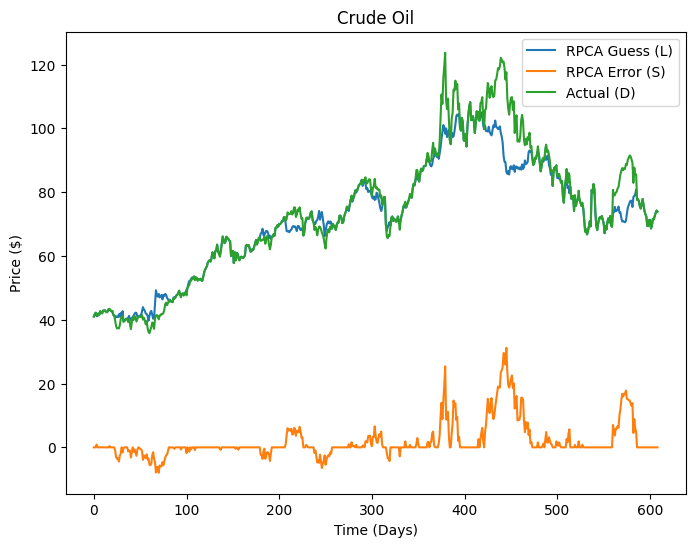

In [21]:
plot_ts_for_idx(1, "Crude Oil")

In [22]:
np.where(S[:,1]*mx[1] > 25)

(array([379, 441, 442, 443, 444, 445]),)

In [23]:
df.iloc[379]

Unnamed: 0                           475
Date                 2022-03-08 00:00:00
Natural_Gas_Price                  4.527
Natural_Gas_Vol.                159170.0
Crude_oil_Price                    123.7
Crude_oil_Vol.                  583110.0
Copper_Price                        4.71
Copper_Vol.                      89600.0
Bitcoin_Price                    38744.8
Bitcoin_Vol.                  2670000000
Platinum_Price                    1151.4
Platinum_Vol.                     5280.0
Ethereum_Price                   2577.21
Ethereum_Vol.                 1440000000
S&P_500_Price                    4170.62
Nasdaq_100_Price                 13267.6
Nasdaq_100_Vol.              308910000.0
Apple_Price                       157.44
Apple_Vol.                     131150000
Tesla_Price                        274.8
Tesla_Vol.                      80400000
Microsoft_Price                   275.85
Microsoft_Vol.                  48160000
Silver_Price                      26.895
Silver_Vol.     

https://www.bloomberg.com/news/articles/2022-03-07/oil-keeps-rising-as-russian-invasion-reverberates-across-markets , crude oil price stonks due to war

We can probably use this as a good indicator of some changes since other stocks which would be correlated expected something different. We can also use this to do linear regression as it would avoid changing the line due to some anomalies since we can remove those anomalies using S.

In [24]:
U,H,V = np.linalg.svd(D,full_matrices=False)

In [25]:
H[-1] = 0

In [26]:
nD = U@np.diag(H)@V

In [27]:
nD.shape

(609, 9)

In [28]:
D - nD

array([[-0.00541017,  0.02240231, -0.02345172, ..., -0.00589817,
         0.01300496,  0.02650064],
       [-0.00591619,  0.02449764, -0.02564519, ..., -0.00644984,
         0.01422133,  0.02897928],
       [-0.00622535,  0.02577781, -0.02698533, ..., -0.00678688,
         0.0149645 ,  0.03049365],
       ...,
       [-0.00176903,  0.00732514, -0.00766828, ..., -0.00192859,
         0.00425238,  0.00866522],
       [-0.00345313,  0.01429865, -0.01496845, ..., -0.0037646 ,
         0.00830063,  0.01691447],
       [-0.00365103,  0.01511812, -0.01582631, ..., -0.00398036,
         0.00877635,  0.01788386]])

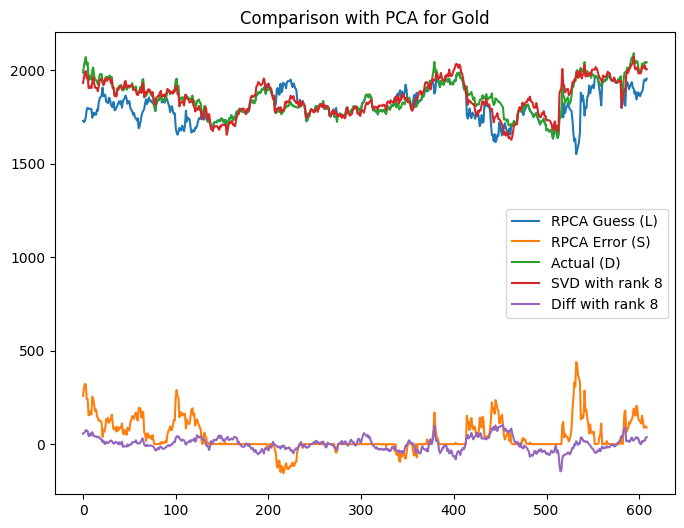

In [29]:
idx = -1
plt.figure(figsize=(8, 6))
plt.plot(range(len(D)),L[:,idx]*mx[idx],label='RPCA Guess (L)')
plt.plot(range(len(D)),S[:,idx]*mx[idx],label='RPCA Error (S)')
plt.plot(range(len(D)),(D[:,idx])*mx[idx],label='Actual (D)')
plt.plot(range(len(D)),(nD[:,idx])*mx[idx],label='SVD with rank 8')
plt.plot(range(len(D)),((D[:,idx] - nD[:,idx]))*mx[idx],label='Diff with rank 8')
plt.title("Comparison with PCA for Gold")
plt.legend()
plt.savefig("Comparison.png")

In [30]:
np.where(S[:,idx]*mx[idx] > 100000)

(array([], dtype=int64),)

In [31]:
df.iloc[580]

Unnamed: 0                            93
Date                 2023-09-20 00:00:00
Natural_Gas_Price                  2.733
Natural_Gas_Vol.                140310.0
Crude_oil_Price                    90.28
Crude_oil_Vol.                   35990.0
Copper_Price                       3.776
Copper_Vol.                      50330.0
Bitcoin_Price                    27125.0
Bitcoin_Vol.                       47230
Platinum_Price                     942.3
Platinum_Vol.                    29060.0
Ethereum_Price                   1622.28
Ethereum_Vol.                     253880
S&P_500_Price                     4402.2
Nasdaq_100_Price                14969.92
Nasdaq_100_Vol.              212790000.0
Apple_Price                       175.49
Apple_Vol.                      55690000
Tesla_Price                       262.59
Tesla_Vol.                     121790000
Microsoft_Price                   320.77
Microsoft_Vol.                  20160000
Silver_Price                      23.836
Silver_Vol.     

In [32]:
np.where(S[:,idx]*mx[idx] > 10000)

(array([], dtype=int64),)

In [33]:
price_columns[idx]

'Gold_Price'

In [34]:
df.iloc[123]

Unnamed: 0                           740
Date                 2021-02-08 00:00:00
Natural_Gas_Price                  2.882
Natural_Gas_Vol.                194660.0
Crude_oil_Price                    57.97
Crude_oil_Vol.                  399720.0
Copper_Price                      3.6665
Copper_Vol.                        110.0
Bitcoin_Price                    46395.7
Bitcoin_Vol.                      248470
Platinum_Price                    1177.3
Platinum_Vol.                      330.0
Ethereum_Price                   1750.18
Ethereum_Vol.                    2170000
S&P_500_Price                    3915.59
Nasdaq_100_Price                13695.02
Nasdaq_100_Vol.              181110000.0
Apple_Price                       136.91
Apple_Vol.                      71300000
Tesla_Price                       287.81
Tesla_Vol.                      60490000
Microsoft_Price                   242.47
Microsoft_Vol.                  22210000
Silver_Price                      27.576
Silver_Vol.     